In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Zomato Dataset.csv')

In [4]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64


In [7]:

from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')  # or 'median'
data['Delivery_person_Age'] = numeric_imputer.fit_transform(data[['Delivery_person_Age']])
data['Delivery_person_Ratings'] = numeric_imputer.fit_transform(data[['Delivery_person_Ratings']])

categorical_imputer = SimpleImputer(strategy='most_frequent')
data['Weather_conditions'] = categorical_imputer.fit_transform(data[['Weather_conditions']])
data['Road_traffic_density'] = categorical_imputer.fit_transform(data[['Road_traffic_density']])
data['multiple_deliveries'] = categorical_imputer.fit_transform(data[['multiple_deliveries']])
data['Festival'] = categorical_imputer.fit_transform(data[['Festival']])
data['City'] = categorical_imputer.fit_transform(data[['City']])

print("\nMissing values after imputation:")
print(data.isnull().sum())



Missing values after imputation:
ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64


In [8]:
def convert_time_to_minutes(time_str):
    try:
        
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    except:
        return None  # Return None for non-parsable strings


data['Time_Orderd'] = data['Time_Orderd'].apply(convert_time_to_minutes)


numeric_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd']
numeric_imputer = SimpleImputer(strategy='mean')

data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])


categorical_cols = ['Weather_conditions', 'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City']
categorical_imputer = SimpleImputer(strategy='most_frequent')

data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])


print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64


In [9]:
print("\nBasic statistics:")
print(data.describe())


Basic statistics:
       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45584.000000             45584.000000         45584.000000   
mean             29.566911                 4.633774            17.017948   
std               5.695578                 0.327663             8.185674   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.566911                 4.700000            18.551440   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45584.000000                45584.000000   
mean              70.229684                   17.465480   
std               22.885575                    7.335562   
min              -88.366217                    0.010000   
2

# What is the average delivery time for the deliveries? How are our delivery times distributed?


In [11]:
print(data.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')


In [12]:

data.columns = data.columns.str.strip()

In [16]:
average_time = data['Time_taken (min)'].mean()
print(f'Average Delivery Time: {average_time:.2f} minutes')

Average Delivery Time: 26.29 minutes


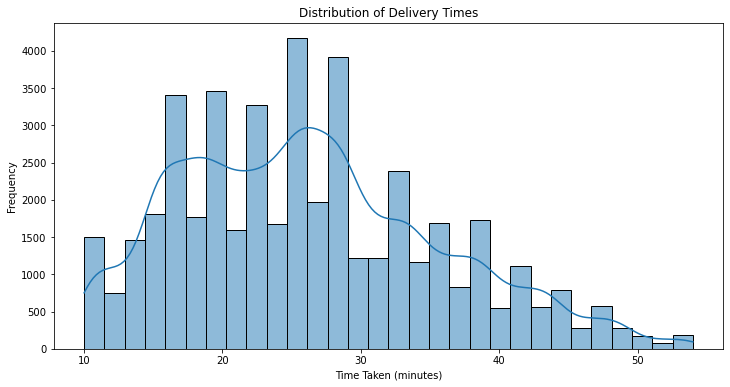

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Time_taken (min)'], bins=30, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

Average delivery time is 26.29 minutes. Delivery times range from 10 minutes to almost an hour, while most delivery times are at the range of 25 to 30 minutes.

#   Relationship between delivery time and delivery person ratings


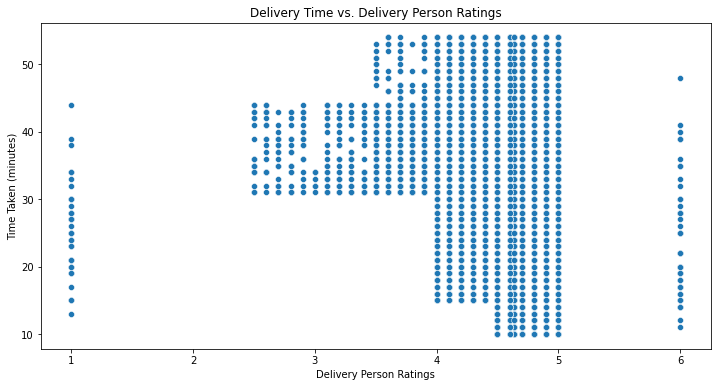

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken (min)', data=data)
plt.title('Delivery Time vs. Delivery Person Ratings')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken (minutes)')
plt.show()

It seems riders with overall ratings of 4,5 and 6 are delivering the orders faster, though there are riders with high ratings having high delivery times too.

In [21]:
correlation = data['Delivery_person_Ratings'].corr(data['Time_taken (min)'])
print(f'Correlation between Ratings and Delivery Time: {correlation:.2f}')

Correlation between Ratings and Delivery Time: -0.33


In [22]:
age_groups = pd.cut(data['Delivery_person_Age'], bins=[20, 25, 30, 35, 40, 45])
age_group_counts = data['Delivery_person_Age'].groupby(age_groups).count()
print("\nAge Group Counts:")
print(age_group_counts)


Age Group Counts:
Delivery_person_Age
(20, 25]    10817
(25, 30]    12759
(30, 35]    10933
(35, 40]     8848
(40, 45]        0
Name: Delivery_person_Age, dtype: int64


#  Distribution of delivery person ages

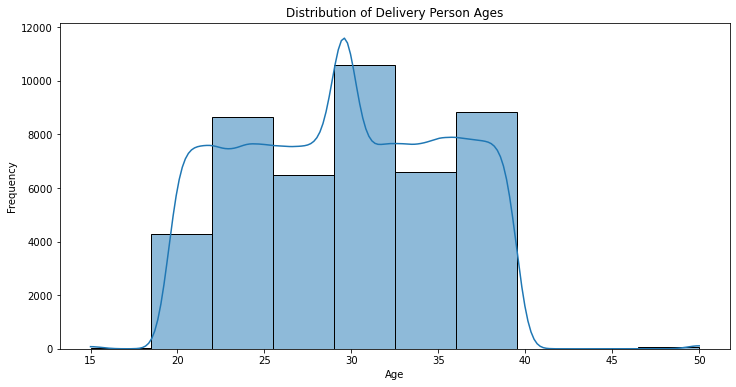

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Delivery_person_Age'], bins=10, kde=True)
plt.title('Distribution of Delivery Person Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

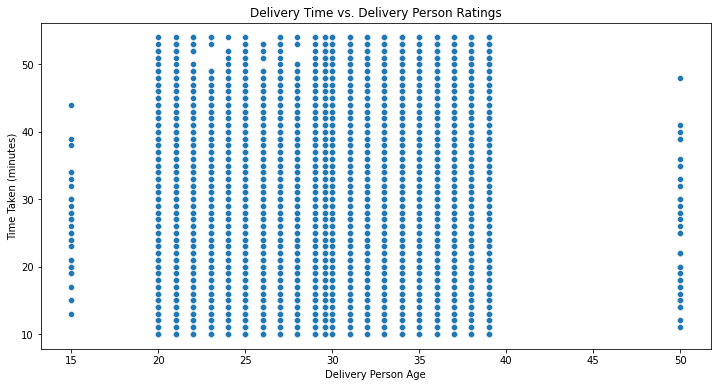

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Delivery_person_Age', y='Time_taken (min)', data=data)
plt.title('Delivery Time vs. Delivery Person Ratings')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (minutes)')
plt.show()

The age of delivery partners ranges from 20 to 50 years, while 29 being the age with the highest count with more than 4000 partners.
We can see a linear relationship between the age and delivery time of partners. As age increases, delivery time is increasing slightly.

In [33]:
order_type_counts = data['Type_of_order'].value_counts()
print("\nBreakdown of Order Types:")
print(order_type_counts)


Breakdown of Order Types:
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: Type_of_order, dtype: int64


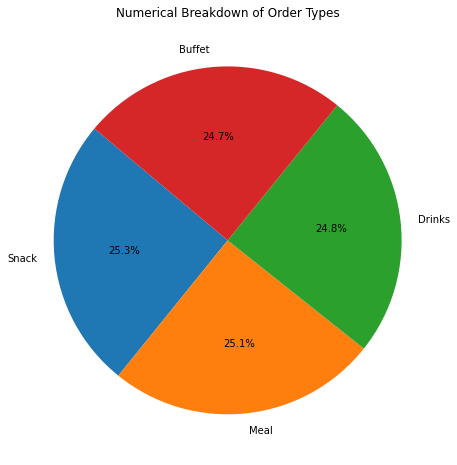

In [41]:
plt.figure(figsize=(15, 8))
plt.pie(order_type_counts, labels=order_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Numerical Breakdown of Order Types')
plt.show()

All types of orders (Snacks, Meals, Drinks, Buffet) contribute almost evenly to overall orders.

Average Delivery Time by Order Type:
Type_of_order
Buffet    26.283320
Drinks    26.187969
Meal      26.417598
Snack     26.285603
Name: Time_taken (min), dtype: float64


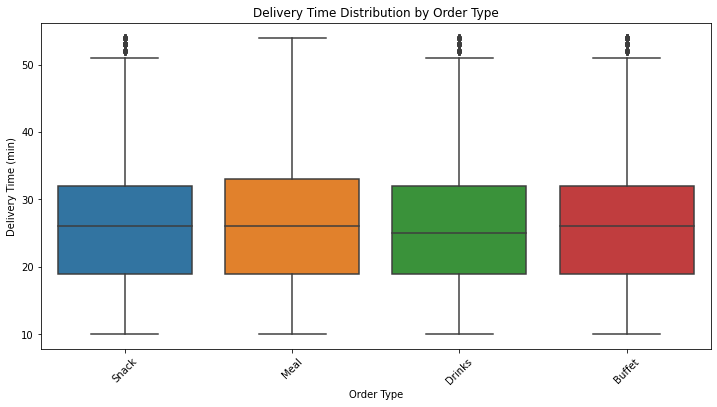

In [45]:
avg_delivery_time_by_order = data.groupby('Type_of_order')['Time_taken (min)'].mean()

print("Average Delivery Time by Order Type:")
print(avg_delivery_time_by_order)

plt.figure(figsize=(12, 6))

sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=data)


plt.title('Delivery Time Distribution by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Delivery Time (min)')
plt.xticks(rotation=45)
plt.show()

There is not much difference in delivery time by the order types as the average delivery time is almost the same for all.


Vehicle Type Distribution:
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64


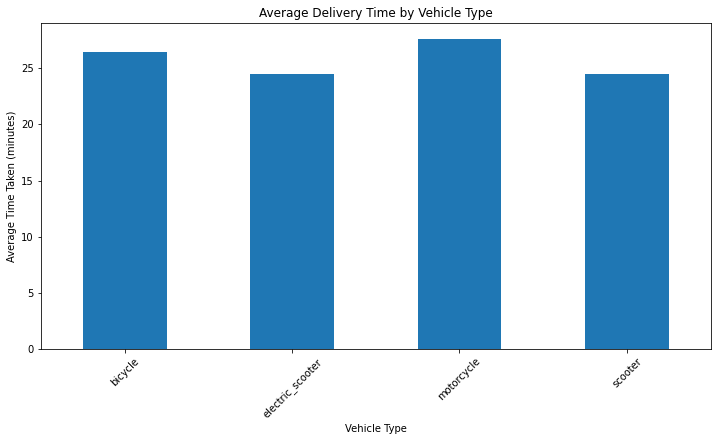

In [47]:
vehicle_counts = data['Type_of_vehicle'].value_counts()
print("\nVehicle Type Distribution:")
print(vehicle_counts)

avg_time_by_vehicle = data.groupby('Type_of_vehicle')['Time_taken (min)'].mean()

plt.figure(figsize=(12, 6))
avg_time_by_vehicle.plot(kind='bar')
plt.title('Average Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()

# Impact of Weather Conditions on Delivery Time

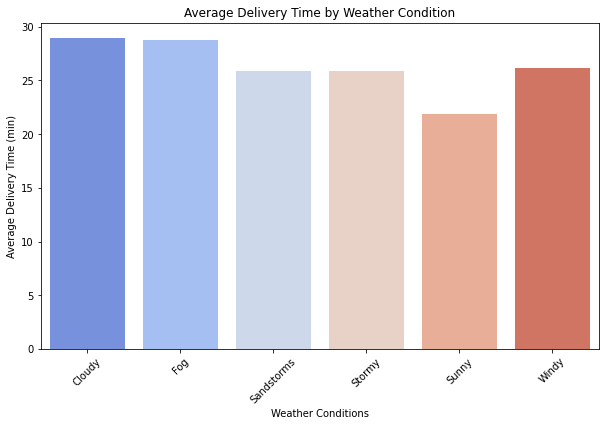

Weather_conditions
Cloudy        28.917164
Fog           28.738179
Sandstorms    25.875500
Stormy        25.868803
Sunny         21.856770
Windy         26.118836
Name: Time_taken (min), dtype: float64


In [48]:
avg_time_by_weather = data.groupby('Weather_conditions')['Time_taken (min)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_time_by_weather.index, y=avg_time_by_weather.values, palette="coolwarm")
plt.title('Average Delivery Time by Weather Condition')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Delivery Time (min)')
plt.xticks(rotation=45)
plt.show()

print(avg_time_by_weather)

# Impact of Road Traffic Density on Delivery Time

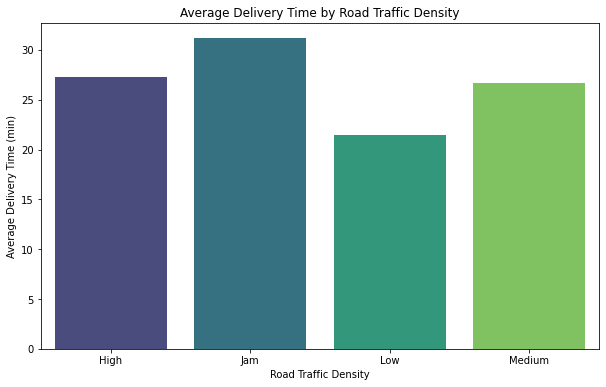

Road_traffic_density
High      27.240109
Jam       31.176038
Low       21.463893
Medium    26.699680
Name: Time_taken (min), dtype: float64


In [49]:
avg_time_by_traffic = data.groupby('Road_traffic_density')['Time_taken (min)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_time_by_traffic.index, y=avg_time_by_traffic.values, palette="viridis")
plt.title('Average Delivery Time by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Delivery Time (min)')
plt.show()

print(avg_time_by_traffic)

Higher traffic density (e.g., “Jam”) might correlate with longer delivery times. This insight could guide route optimization efforts or scheduling adjustments during peak traffic hours.

# Delivery Times Across Vehicle Types

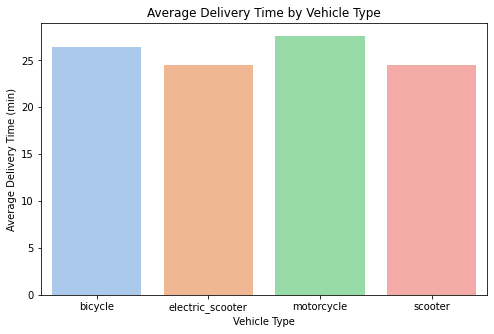

Type_of_vehicle
bicycle             26.426471
electric_scooter    24.470110
motorcycle          27.605774
scooter             24.478819
Name: Time_taken (min), dtype: float64


In [50]:
avg_time_by_vehicle = data.groupby('Type_of_vehicle')['Time_taken (min)'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_time_by_vehicle.index, y=avg_time_by_vehicle.values, palette="pastel")
plt.title('Average Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Delivery Time (min)')
plt.show()

print(avg_time_by_vehicle)

# Delivery Times Across City Types

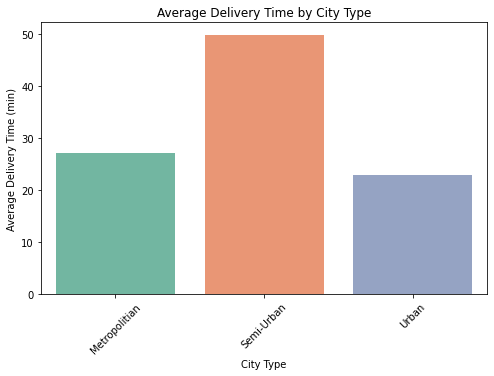

City
Metropolitian    27.135716
Semi-Urban       49.731707
Urban            22.983322
Name: Time_taken (min), dtype: float64


In [51]:
avg_time_by_city = data.groupby('City')['Time_taken (min)'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_time_by_city.index, y=avg_time_by_city.values, palette="Set2")
plt.title('Average Delivery Time by City Type')
plt.xlabel('City Type')
plt.ylabel('Average Delivery Time (min)')
plt.xticks(rotation=45)
plt.show()

print(avg_time_by_city)

# Effect of Festivals on Delivery Time

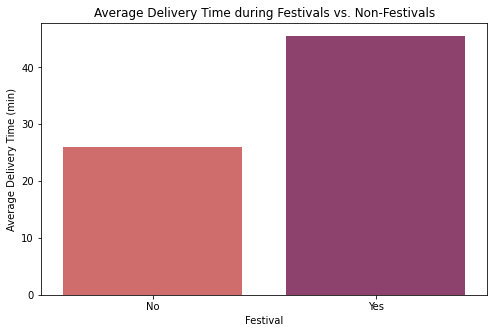

Festival
No     25.908521
Yes    45.517857
Name: Time_taken (min), dtype: float64


In [54]:

avg_time_by_festival = data.groupby('Festival')['Time_taken (min)'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_time_by_festival.index, y=avg_time_by_festival.values, palette="flare")
plt.title('Average Delivery Time during Festivals vs. Non-Festivals')
plt.xlabel('Festival')
plt.ylabel('Average Delivery Time (min)')
plt.show()

print(avg_time_by_festival)


#  Impact of Multiple Deliveries on Delivery Time

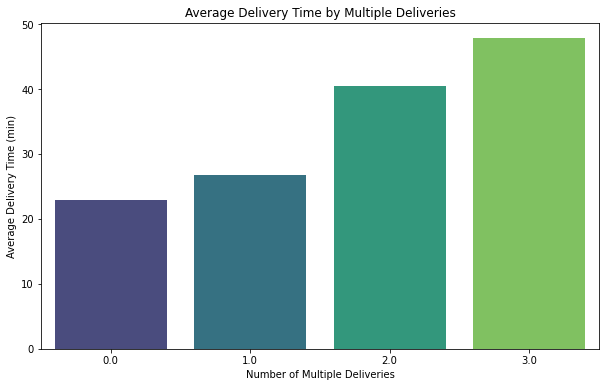

multiple_deliveries
0.0    22.876188
1.0    26.715653
2.0    40.454912
3.0    47.819945
Name: Time_taken (min), dtype: float64


In [55]:

avg_time_by_multiple_deliveries = data.groupby('multiple_deliveries')['Time_taken (min)'].mean()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_time_by_multiple_deliveries.index, y=avg_time_by_multiple_deliveries.values, palette="viridis")
plt.title('Average Delivery Time by Multiple Deliveries')
plt.xlabel('Number of Multiple Deliveries')
plt.ylabel('Average Delivery Time (min)')
plt.show()

print(avg_time_by_multiple_deliveries)


#  Impact of Vehicle Condition on Delivery Time

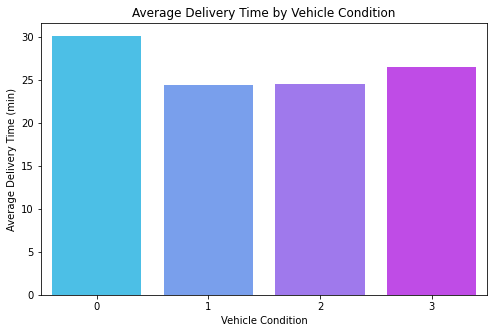

Vehicle_condition
0    30.073109
1    24.353673
2    24.454394
3    26.492308
Name: Time_taken (min), dtype: float64


In [56]:

avg_time_by_vehicle_condition = data.groupby('Vehicle_condition')['Time_taken (min)'].mean()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_time_by_vehicle_condition.index, y=avg_time_by_vehicle_condition.values, palette="cool")
plt.title('Average Delivery Time by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Delivery Time (min)')
plt.show()

print(avg_time_by_vehicle_condition)


# Delivery Times Across Different Times of Day 

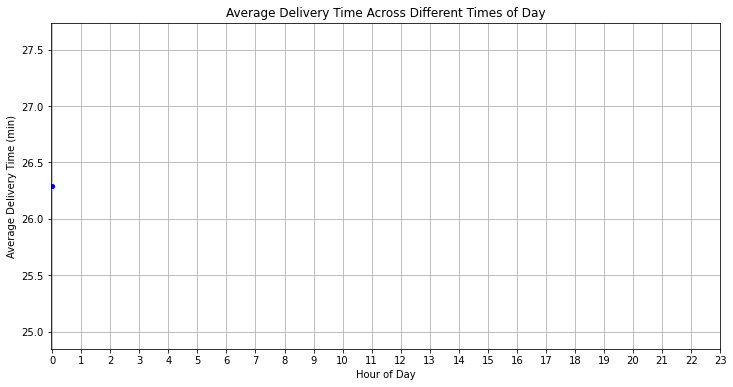

Order_Hour
0    26.293963
Name: Time_taken (min), dtype: float64


In [59]:

data['Order_Hour'] = pd.to_datetime(data['Time_Orderd'], errors='coerce').dt.hour

avg_delivery_time_by_hour = data.groupby('Order_Hour')['Time_taken (min)'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_delivery_time_by_hour.index, y=avg_delivery_time_by_hour.values, marker='o', color='b')
plt.title('Average Delivery Time Across Different Times of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Time (min)')
plt.xticks(range(0, 24))  # Setting x-ticks from 0 to 23 for each hour
plt.grid(True)
plt.show()

print(avg_delivery_time_by_hour)
